In [1]:
import pandas as pd
import numpy as np
import torch
import os
import torchvision
from torchvision.transforms import ToTensor, ToPILImage, Normalize, Compose,Resize
from torch.utils.data import DataLoader
from torch.utils.data import Dataset
from torchvision import transforms 

from torch.utils.data.sampler import SubsetRandomSampler
import torch.nn as nn
import torch.nn.functional as F

from torch.utils.data import random_split
from torchvision.datasets.utils import download_url
import matplotlib.pyplot as plt

In [2]:
from PIL import Image
import PIL

In [3]:
data_folder="../input/stylumia-complete/"

In [4]:
train_file=pd.read_csv(os.path.join(data_folder+'train_label.csv'))

In [5]:
train_file

,file_name,label
0,Image_000000.jpg,8
1,Image_000001.jpg,8
2,Image_000002.jpg,8
3,Image_000003.jpg,8
4,Image_000004.jpg,8
...,...,...
31744,Image_031833.jpg,7
31745,Image_031834.jpg,7
31746,Image_031835.jpg,7
31747,Image_031836.jpg,7


In [6]:
class CustomDataset(torch.utils.data.Dataset):
    def __init__(self, df, images_folder, mode,transform = ToTensor()):
        self.df = df
        self.mode=mode
        self.images_folder = os.path.join(images_folder+'/'+mode)
        self.transform = transform
        self.transform2=Resize((256,256))

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        filename = self.df.loc[index, "file_name"]
        label = self.df.loc[index, "label"]
        image = PIL.Image.open(os.path.join(self.images_folder,filename))
        if self.transform is not None:
            image=self.transform2(image)
            image = self.transform(image)
        return image, label

In [7]:
img1=os.path.join(data_folder+'train/'+train_file.loc[12658,"file_name"])

In [8]:
img1

'../input/stylumia-complete/train/Image_012672.jpg'

In [9]:
image = PIL.Image.open(img1)

In [10]:
512/762

0.6719160104986877

In [11]:
x=transforms.Resize((256,256))

In [12]:
img=x(image)

In [13]:
img.size

(256, 256)

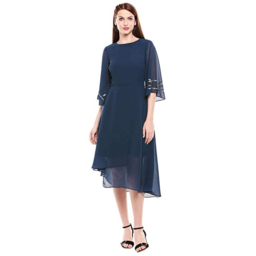

In [14]:
img

In [15]:
pwd

'/kaggle/working'

In [16]:
convert_tensor = torchvision.transforms.ToTensor()

convert_tensor(image)

tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]],

        [[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]])

In [17]:
dataset=CustomDataset(train_file,data_folder,"train")

In [18]:
dataset

In [19]:
train_features, train_labels = next(iter(dataset))


In [20]:
train_labels

8

In [21]:
train_features

tensor([[[0.8275, 0.8275, 0.8353,  ..., 0.6902, 0.6902, 0.6941],
         [0.8275, 0.8353, 0.8314,  ..., 0.6902, 0.6941, 0.6941],
         [0.8275, 0.8314, 0.8314,  ..., 0.6863, 0.6941, 0.6902],
         ...,
         [0.6353, 0.6353, 0.6353,  ..., 0.7373, 0.7333, 0.7333],
         [0.6392, 0.6392, 0.6392,  ..., 0.7373, 0.7333, 0.7294],
         [0.6471, 0.6431, 0.6431,  ..., 0.7294, 0.7333, 0.7294]],

        [[0.7765, 0.7765, 0.7843,  ..., 0.6353, 0.6353, 0.6392],
         [0.7765, 0.7843, 0.7804,  ..., 0.6353, 0.6431, 0.6392],
         [0.7765, 0.7804, 0.7804,  ..., 0.6353, 0.6431, 0.6392],
         ...,
         [0.5804, 0.5804, 0.5804,  ..., 0.6824, 0.6784, 0.6784],
         [0.5843, 0.5843, 0.5843,  ..., 0.6824, 0.6784, 0.6745],
         [0.5922, 0.5882, 0.5882,  ..., 0.6745, 0.6784, 0.6745]],

        [[0.7137, 0.7137, 0.7216,  ..., 0.5843, 0.5882, 0.5882],
         [0.7137, 0.7216, 0.7176,  ..., 0.5843, 0.5882, 0.5882],
         [0.7137, 0.7176, 0.7176,  ..., 0.5725, 0.5804, 0.

In [22]:
train_file

,file_name,label
0,Image_000000.jpg,8
1,Image_000001.jpg,8
2,Image_000002.jpg,8
3,Image_000003.jpg,8
4,Image_000004.jpg,8
...,...,...
31744,Image_031833.jpg,7
31745,Image_031834.jpg,7
31746,Image_031835.jpg,7
31747,Image_031836.jpg,7


In [23]:
train_file['label'].value_counts()

6     6285
3     4139
9     3933
7     3664
2     2778
5     2433
8     2338
0     2166
4     2052
10    1039
1      922
Name: label, dtype: int64

In [24]:
random_seed = 42
torch.manual_seed(random_seed);

In [25]:
len(train_file)

31749

In [26]:
dataset.__len__()

31749

In [27]:
dataset_size = len(dataset)
dataset_indices = list(range(dataset_size))

In [28]:
np.random.shuffle(dataset_indices)

In [29]:
#dataset_indices

In [30]:
val_split_index = int(np.floor(0.2 * dataset_size))

In [31]:
val_split_index

6349

In [32]:
train_idx, val_idx = dataset_indices[val_split_index:], dataset_indices[:val_split_index]

In [33]:
#train_idx

In [34]:
train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)
len(train_sampler), len(val_sampler)


(25400, 6349)

In [35]:
train_sampler

In [36]:
train_dl = DataLoader(dataset=dataset, shuffle=False, batch_size=32, sampler=train_sampler)
val_dl = DataLoader(dataset=dataset, shuffle=False, batch_size=32, sampler=val_sampler)

In [37]:
val_dl

In [38]:
train_features, train_labels = next(iter(train_dl))
print(train_labels)


tensor([ 4,  9,  0,  2,  4,  4,  6,  6,  6,  6,  3,  2,  9,  9,  0,  7,  6, 10,
         4,  6,  2,  6,  4,  5,  6,  9,  3,  7,  8,  3,  4,  6])


In [39]:
for i in val_dl:
    images,labels=i
    print(labels)
    break

tensor([3, 4, 7, 6, 2, 5, 4, 4, 4, 6, 7, 5, 4, 9, 2, 3, 8, 8, 4, 6, 3, 6, 3, 6,
        5, 0, 8, 8, 6, 2, 3, 4])


In [40]:
torch.cuda.is_available()

True

In [41]:
from torchvision.utils import make_grid

def show_batch(dl):
    for images, labels in dl:
        fig, ax = plt.subplots(figsize=(12, 6))
        ax.set_xticks([]); ax.set_yticks([])
        ax.imshow(make_grid(images, nrow=4).permute(1,2,0))
        break

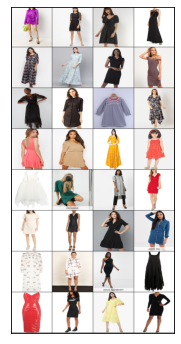

In [42]:
show_batch(train_dl)

In [43]:
class ImageClassificationBase(nn.Module):
 
    def training_step(self,batch):
        model.train()
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        acc=accuracy(labels,out)
        return loss,acc
    
   
    def validation_step(self,batch):
        model.eval()
        images,labels=batch
        out=self(images)
        loss=F.cross_entropy(out,labels)
        acc=accuracy(labels,out)
        return {'val_loss':loss.detach(),'val_acc':acc}
    
    
    def validation_epoch_end(self,result):
        loss=[x['val_loss'] for x in result]
        acc= [x['val_acc'] for x in result]
        l_b=torch.stack(loss).mean()
        a_b=torch.stack(acc).mean()
        return {'val_loss':l_b.item(), 'val_acc': a_b.item()}
    
    def epoch_end(self,epoch,result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch,result['val_loss'], result['val_acc']))
        

In [44]:
def conv_block(in_channels, out_channels, pool=False):
    layers = [nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1), 
              nn.BatchNorm2d(out_channels), 
              nn.ReLU(inplace=True)]
    if pool: layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)

class CNNR(ImageClassificationBase):
    def __init__(self):
        super().__init__()
        
        self.conv1 = conv_block(3, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        self.mp=nn.MaxPool2d(4)
        self.flat=nn.Flatten()
        self.dropout=nn.Dropout(0.2)
        self.linear1=nn.Linear(32768,512)
        self.linear2=nn.Linear(512, 11)

        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.mp(out)
        out = self.flat(out)
        #print(out.shape)
        #print("1")
        out = self.dropout(out)
        out = self.linear1(out)
        #print(out.shape)
        #print("2")
        out = self.linear2(out)
        #print("3")
        return out

In [45]:
model =CNNR()
model

CNNR(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)

In [46]:
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available():
        return torch.device('cuda')
    else:
        return torch.device('cpu')
    
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl: 
            yield to_device(b, self.device)

    def __len__(self):
        """Number of batches"""
        return len(self.dl)

In [47]:
device = get_default_device()
device

device(type='cuda')

In [48]:
train_dl = DeviceDataLoader(train_dl, device)
val_dl = DeviceDataLoader(val_dl, device)

In [49]:
train_dl

In [50]:
val_dl

In [51]:
torch.cuda.is_available()

True

In [52]:
model = to_device(model, device)
model

CNNR(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)

In [53]:
def accuracy(act,pred):
    _, preds = torch.max(pred, dim=1)
    #print(preds[0])
    #print(act[0])
    return torch.tensor(torch.sum(preds==act).item() / len(preds))

In [54]:
#for batch in train_dl:
 #   images,labels=batch
  #  out=model(images)
   # print(accuracy(labels,out))
    #print(out[:2])
    #print(labels[0])
    
    #break


In [55]:
def fit(model,train_dl,valid_dl,opt,lr,epochs):
    history = []
    optimizer = opt(model.parameters(), lr)
    for epoch in range(epochs):
        epoch_acc=[]
        for batch in train_dl:
            images,labels=batch
            loss,acc=model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            epoch_acc.append(acc)
        dic_train=torch.stack(epoch_acc).mean()
        print("Epoch [{}], train_acc: {:.4f}".format(
        epoch,dic_train))
        with torch.no_grad():
            res=[model.validation_step(batch) for batch in val_dl ]
        dic=model.validation_epoch_end(res)
        history.append(dic)
        model.epoch_end(epoch,dic)
    return history

In [56]:
opt=torch.optim.Adam

In [57]:
pytorch_total_params = sum(p.numel() for p in model.parameters())

In [58]:
pytorch_total_params

23353611

In [59]:
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())



Model's state_dict:
conv1.0.weight 	 torch.Size([64, 3, 3, 3])
conv1.0.bias 	 torch.Size([64])
conv1.1.weight 	 torch.Size([64])
conv1.1.bias 	 torch.Size([64])
conv1.1.running_mean 	 torch.Size([64])
conv1.1.running_var 	 torch.Size([64])
conv1.1.num_batches_tracked 	 torch.Size([])
conv2.0.weight 	 torch.Size([128, 64, 3, 3])
conv2.0.bias 	 torch.Size([128])
conv2.1.weight 	 torch.Size([128])
conv2.1.bias 	 torch.Size([128])
conv2.1.running_mean 	 torch.Size([128])
conv2.1.running_var 	 torch.Size([128])
conv2.1.num_batches_tracked 	 torch.Size([])
res1.0.0.weight 	 torch.Size([128, 128, 3, 3])
res1.0.0.bias 	 torch.Size([128])
res1.0.1.weight 	 torch.Size([128])
res1.0.1.bias 	 torch.Size([128])
res1.0.1.running_mean 	 torch.Size([128])
res1.0.1.running_var 	 torch.Size([128])
res1.0.1.num_batches_tracked 	 torch.Size([])
res1.1.0.weight 	 torch.Size([128, 128, 3, 3])
res1.1.0.bias 	 torch.Size([128])
res1.1.1.weight 	 torch.Size([128])
res1.1.1.bias 	 torch.Size([128])
res1.1.1.run

In [60]:
test_df=pd.DataFrame()
test_df.to_csv('file_res1.csv')

In [61]:
import glob

In [62]:
file_path=[]
for name in glob.glob('../input/stylumia-complete/test/*'):
    file_name=name.split('/')
    file_path.append(file_name[-1])

In [63]:
test_df['file_path']=pd.Series(file_path)

In [64]:
test_df

,file_path
0,Image_test_015339.jpg
1,Image_test_015427.jpg
2,Image_test_006765.jpg
3,Image_test_009681.jpg
4,Image_test_002734.jpg
...,...
18218,Image_test_017934.jpg
18219,Image_test_008324.jpg
18220,Image_test_010326.jpg
18221,Image_test_001255.jpg


In [65]:
class CustomDataset_test(torch.utils.data.Dataset):
    def __init__(self, df, images_folder, mode,transform = ToTensor()):
        self.df = df
        self.mode=mode
        self.images_folder = os.path.join(images_folder+'/'+mode)
        self.transform = transform
        self.transform2=Resize((256,256))

    def __len__(self):
        return len(self.df)
    def __getitem__(self, index):
        filename = self.df.loc[index, "file_path"]
        image = PIL.Image.open(os.path.join(self.images_folder,filename))
        if self.transform is not None:
            image=self.transform2(image)
            image = self.transform(image)
        return image

In [66]:
dataset_test=CustomDataset_test(test_df,data_folder,"test")

In [67]:
len(dataset_test)

18223

In [68]:
test_dl = DataLoader(dataset=dataset_test, shuffle=True, batch_size=32)


In [69]:
for image in test_dl:
    print(image)
    break

tensor([[[[0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          ...,
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451]],

         [[0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          ...,
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451]],

         [[0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0.9451, 0.9451, 0.9451],
          [0.9451, 0.9451, 0.9451,  ..., 0

In [70]:
test_dl = DeviceDataLoader(test_dl, device)

In [71]:
fit(model,train_dl,val_dl,opt,0.0005,10)
fit(model,train_dl,val_dl,opt,0.0002,3)
fit(model,train_dl,val_dl,opt,0.0001,3)


Epoch [0], train_acc: 0.1889
Epoch [0], val_loss: 3.1069, val_acc: 0.2658
Epoch [1], train_acc: 0.3002
Epoch [1], val_loss: 1.9719, val_acc: 0.3244
Epoch [2], train_acc: 0.3482
Epoch [2], val_loss: 1.9704, val_acc: 0.3255
Epoch [3], train_acc: 0.3939
Epoch [3], val_loss: 1.7938, val_acc: 0.3924
Epoch [4], train_acc: 0.4324
Epoch [4], val_loss: 1.6632, val_acc: 0.4281
Epoch [5], train_acc: 0.4645
Epoch [5], val_loss: 2.0187, val_acc: 0.3000
Epoch [6], train_acc: 0.4946
Epoch [6], val_loss: 1.4888, val_acc: 0.4928
Epoch [7], train_acc: 0.5321
Epoch [7], val_loss: 1.4391, val_acc: 0.5125
Epoch [8], train_acc: 0.5612
Epoch [8], val_loss: 1.4303, val_acc: 0.5128
Epoch [9], train_acc: 0.6010
Epoch [9], val_loss: 1.3512, val_acc: 0.5346
Epoch [0], train_acc: 0.6822
Epoch [0], val_loss: 1.2837, val_acc: 0.5752
Epoch [1], train_acc: 0.7175
Epoch [1], val_loss: 1.3451, val_acc: 0.5621
Epoch [2], train_acc: 0.7529
Epoch [2], val_loss: 1.3908, val_acc: 0.5573
Epoch [0], train_acc: 0.8173
Epoch [0]

[{'val_loss': 1.4294716119766235, 'val_acc': 0.583965539932251},
 {'val_loss': 1.4755653142929077, 'val_acc': 0.5860673785209656},
 {'val_loss': 1.509245753288269, 'val_acc': 0.588217556476593}]

In [72]:
torch.save(model.state_dict(), 'res_cust1.pth')
torch.save(model, 'res_cust_whole.pkl')

In [73]:
def predict(test_dl,model):
    ans=[]
    with torch.no_grad():
        for batch in test_dl:
            images=batch
            out=model(images)
        #print(out)
        #print(type(out))
            _, preds = torch.max(out, dim=1)
            preds=preds.cpu().detach().numpy()
            preds=preds.tolist()
            ans.extend(preds)
            
    label=pd.Series(ans)
    return ans  

In [74]:
test_df['label']=predict(test_dl,model)

In [75]:
test_df

,file_path,label
0,Image_test_015339.jpg,8
1,Image_test_015427.jpg,3
2,Image_test_006765.jpg,6
3,Image_test_009681.jpg,6
4,Image_test_002734.jpg,1
...,...,...
18218,Image_test_017934.jpg,8
18219,Image_test_008324.jpg,6
18220,Image_test_010326.jpg,6
18221,Image_test_001255.jpg,4


In [76]:
test_df.to_csv('file_res_2.csv')